feature selection using mutual information score

In [32]:
from warnings import filterwarnings
filterwarnings("ignore")

In [33]:
import pandas as pd
import numpy as np

Read dataset

In [34]:
df=pd.read_csv("Cars93.csv")
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [36]:
# check missing values
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               37
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [37]:
# check duplicates
df.duplicated().sum()

0

Seperate x and y in data

In [38]:
x=df.drop(columns=["id","Weight"])
x.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [39]:
y=df[["Weight"]]
y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


seperate cat and con in x

In [40]:
cat=list(x.columns[x.dtypes=="object"])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [41]:
con=list(x.columns[x.dtypes!="object"])
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

Create a preprocessing pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [43]:
num_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="mean")),
                    ('scaler',StandardScaler())])
cat_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                          ('ordinal',OrdinalEncoder())])
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)]).set_output(transform="pandas")

In [44]:
x_pre1=pre1.fit_transform(x)

In [45]:
x_pre1.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Turn.circle,num__Rear.seat.room,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015,0.0,48.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


Perform feature selection

In [46]:
from sklearn.feature_selection import mutual_info_regression
mi=mutual_info_regression(x_pre1,y)
mi

array([0.69162315, 0.56786337, 0.49197014, 0.88049281, 0.73862489,
       1.11560022, 0.72505574, 0.14251892, 0.44761473, 0.91357147,
       0.28784617, 0.52579046, 0.84150721, 0.8393415 , 0.39194684,
       0.27799548, 0.5744955 , 0.03351424, 0.        , 0.79163069,
       0.13544919, 0.13662634, 0.61374827, 0.2271242 , 0.        ,
       0.05824562])

In [47]:
mi=pd.Series(mi)
mi.index=x_pre1.columns
mi=mi.sort_values(ascending=False)
mi

num__EngineSize            1.115600
num__Fuel.tank.capacity    0.913571
num__MPG.city              0.880493
num__Wheelbase             0.841507
num__Width                 0.839341
cat__Type                  0.791631
num__MPG.highway           0.738625
num__Horsepower            0.725056
num__Min.Price             0.691623
cat__Cylinders             0.613748
num__Luggage.room          0.574495
num__Price                 0.567863
num__Length                0.525790
num__Max.Price             0.491970
num__Rev.per.mile          0.447615
num__Turn.circle           0.391947
num__Passengers            0.287846
num__Rear.seat.room        0.277995
cat__Man.trans.avail       0.227124
num__RPM                   0.142519
cat__DriveTrain            0.136626
cat__AirBags               0.135449
cat__Make                  0.058246
cat__Manufacturer          0.033514
cat__Model                 0.000000
cat__Origin                0.000000
dtype: float64

<Axes: title={'center': 'mutual info score'}>

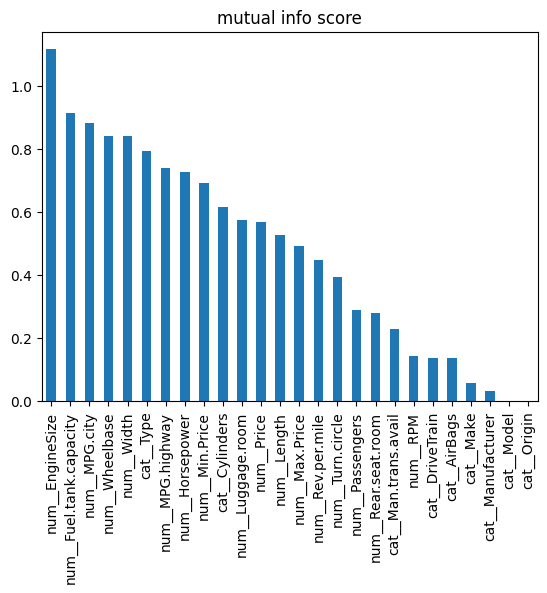

In [48]:
mi.plot(kind="bar",title="mutual info score")

In [49]:
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(mutual_info_regression,k=5)
sel.fit(x_pre1,y)
sel_cols=sel.get_feature_names_out()
sel_cols

array(['num__MPG.city', 'num__EngineSize', 'num__Fuel.tank.capacity',
       'num__Wheelbase', 'num__Width'], dtype=object)

In [50]:
imp_cols=[]
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)
imp_cols

['MPG.city', 'EngineSize', 'Fuel.tank.capacity', 'Wheelbase', 'Width']

In [51]:
x_imp=x[imp_cols]
x_imp.head()

,MPG.city,EngineSize,Fuel.tank.capacity,Wheelbase,Width
0,25,1.8,13.2,102,68
1,18,3.2,18.0,115,71
2,20,2.8,16.9,102,67
3,19,2.8,21.1,106,70
4,22,3.5,21.1,109,69


In [52]:
cat_sel=list(x_imp.columns[x_imp.dtypes=="object"])
cat_sel

[]

In [53]:
con_sel=list(x_imp.columns[x_imp.dtypes!="object"])
con_sel

['MPG.city', 'EngineSize', 'Fuel.tank.capacity', 'Wheelbase', 'Width']

In [54]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy="mean")),
                          ("scaler",StandardScaler())])

In [55]:
cat_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                          ('Ohe',OneHotEncoder(handle_unknown="ignore",sparse=False))])

In [57]:
pre2=ColumnTransformer([('num',num_pipe2,con_sel),
                        ('cat',cat_pipe2,cat_sel)]).set_output(transform="pandas")

In [60]:
x_sel_pre=pre2.fit_transform(x_imp)

In [61]:
x_sel_pre.head()

,num__MPG.city,num__EngineSize,num__Fuel.tank.capacity,num__Wheelbase,num__Width
0,0.471312,-0.841022,-1.062184,-0.286932,-0.366184
1,-0.781032,0.515869,0.409445,1.629649,0.431983
2,-0.423219,0.128186,0.072197,-0.286932,-0.632239
3,-0.602126,0.128186,1.359872,0.302785,0.165927
4,-0.065407,0.806631,1.359872,0.745073,-0.100128


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sel_pre,y,test_size=0.2,random_state=21)

In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [64]:
model.score(x_train,y_train)

0.9432103225552912

In [65]:
model.score(x_test,y_test)

0.8770046920243761

In [66]:
y_pred=model.predict(x_test)

In [67]:
y_pred[:5]

array([[2627.27432056],
       [3581.13712264],
       [2992.26163512],
       [3341.59570515],
       [4160.30711996]])

In [68]:
from sklearn.metrics import *


In [70]:
mae=mean_absolute_error(y_test,y_pred)
mae

153.98897580119467

In [71]:
mse=mean_squared_error(y_test,y_pred)
mse

44610.023424812025

In [73]:
rmse=mse**1/2
rmse

22305.011712406013

In [75]:
r2=r2_score(y_test,y_pred)
r2

0.8770046920243761